In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import os
import calendar
import string
%matplotlib inline

In [2]:
# figure root
fig_root = os.environ['HOME']+'/work/E3SMv1_Future_Projection/figures'
save_fig = True

In [3]:
# set esgf
# esgf_root = '/Volumes/LaCie/data/cmip6/esgf/sst'
esgf_root = os.environ['HOME']+'/data/cmip6/esgf/sst'
# list of models
prefix_list = [
    'tosga_Omon_BCC-CSM2-MR_ssp585_r1i1p1f1_gn',
    'tosga_Omon_CanESM5_ssp585_r17i1p2f1_gn',
    'tosga_Omon_CanESM5_ssp585_r25i1p2f1_gn',
    'tosga_Omon_CanESM5_ssp585_r2i1p2f1_gn',
    'tosga_Omon_CanESM5-CanOE_ssp585_r1i1p2f1_gn',
    'tosga_Omon_CanESM5-CanOE_ssp585_r2i1p2f1_gn',
    'tosga_Omon_CESM2_ssp585_r10i1p1f1_gn',
    'tosga_Omon_CESM2_ssp585_r11i1p1f1_gn',
    'tosga_Omon_CESM2_ssp585_r4i1p1f1_gn',
    'tosga_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn',
    'tosga_Omon_CESM2-WACCM_ssp585_r2i1p1f1_gn',
    'tosga_Omon_CESM2-WACCM_ssp585_r3i1p1f1_gn',
    'tosga_Omon_CESM2-WACCM_ssp585_r4i1p1f1_gn',
    'tosga_Omon_CESM2-WACCM_ssp585_r5i1p1f1_gn',
    'tosga_Omon_CNRM-CM6-1-HR_ssp585_r1i1p1f2_gn',
    'tosga_Omon_CNRM-CM6-1_ssp585_r1i1p1f2_gn',
    'tosga_Omon_CNRM-CM6-1_ssp585_r2i1p1f2_gn',
    'tosga_Omon_CNRM-CM6-1_ssp585_r3i1p1f2_gn',
    'tosga_Omon_CNRM-CM6-1_ssp585_r4i1p1f2_gn',
    'tosga_Omon_CNRM-CM6-1_ssp585_r5i1p1f2_gn',
    'tosga_Omon_CNRM-ESM2-1_ssp585_r1i1p1f2_gn',
    'tosga_Omon_CNRM-ESM2-1_ssp585_r4i1p1f2_gn',
    'tosga_Omon_CNRM-ESM2-1_ssp585_r5i1p1f2_gn',
    'tosga_Omon_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gm',
    'tosga_Omon_HadGEM3-GC31-LL_ssp585_r2i1p1f3_gm',
    'tosga_Omon_HadGEM3-GC31-LL_ssp585_r3i1p1f3_gm',
    'tosga_Omon_HadGEM3-GC31-LL_ssp585_r4i1p1f3_gm',
    'tosga_Omon_HadGEM3-GC31-MM_ssp585_r1i1p1f3_gm',
    'tosga_Omon_HadGEM3-GC31-MM_ssp585_r2i1p1f3_gm',
    'tosga_Omon_HadGEM3-GC31-MM_ssp585_r3i1p1f3_gm',
    'tosga_Omon_INM-CM4-8_ssp585_r1i1p1f1_gr1',
    'tosga_Omon_INM-CM5-0_ssp585_r1i1p1f1_gr1',
    'tosga_Omon_IPSL-CM6A-LR_ssp585_r14i1p1f1_gn',
    'tosga_Omon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gn',
    'tosga_Omon_IPSL-CM6A-LR_ssp585_r2i1p1f1_gn',
    'tosga_Omon_IPSL-CM6A-LR_ssp585_r3i1p1f1_gn',
    'tosga_Omon_IPSL-CM6A-LR_ssp585_r4i1p1f1_gn',
    'tosga_Omon_MCM-UA-1-0_ssp585_r1i1p1f2_gn',
    'tosga_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn',
    'tosga_Omon_MPI-ESM1-2-HR_ssp585_r2i1p1f1_gn',
    'tosga_Omon_MPI-ESM1-2-LR_ssp585_r10i1p1f1_gn',
    'tosga_Omon_MPI-ESM1-2-LR_ssp585_r1i1p1f1_gn',
    'tosga_Omon_MPI-ESM1-2-LR_ssp585_r2i1p1f1_gn',
    'tosga_Omon_MPI-ESM1-2-LR_ssp585_r3i1p1f1_gn',
    'tosga_Omon_MPI-ESM1-2-LR_ssp585_r4i1p1f1_gn',
    'tosga_Omon_MRI-ESM2-0_ssp585_r1i1p1f1_gm',
    'tosga_Omon_MRI-ESM2-0_ssp585_r1i2p1f1_gm',
    'tosga_Omon_NorESM2-LM_ssp585_r1i1p1f1_gm',
    'tosga_Omon_NorESM2-MM_ssp585_r1i1p1f1_gm',
    'tosga_Omon_UKESM1-0-LL_ssp585_r1i1p1f2_gm',
    'tosga_Omon_UKESM1-0-LL_ssp585_r2i1p1f2_gm',
    'tosga_Omon_UKESM1-0-LL_ssp585_r3i1p1f2_gm',
    'tosga_Omon_UKESM1-0-LL_ssp585_r4i1p1f2_gm',
    'tosga_Omon_UKESM1-0-LL_ssp585_r8i1p1f2_gm',
    ]
print(len(prefix_list))
sources = []
for vprefix in prefix_list:
    var, realm, model, expid, variantid, gridid = vprefix.split('_')
    s = {
        'prefix': vprefix,
        'variable': var,
        'realm': realm,
        'model': model,
        'expid': expid,
        'variantid': variantid,
        'gridid': gridid,
    }
    sources.append(s)

54


In [4]:
# load esgf data
esgf_vars = []
for s in sources:
    print(s['prefix'])
    infile_list = [esgf_root+'/'+filename \
                   for filename in os.listdir(esgf_root) if filename.startswith(s['prefix'])]
    print('Opening {:d} files...'.format(len(infile_list)))
    dset = xr.open_mfdataset(infile_list, combine='by_coords')
    da = dset.data_vars[s['variable']]
    esgf_vars.append(da)
    dset.close()
        

tosga_Omon_BCC-CSM2-MR_ssp585_r1i1p1f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r17i1p2f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r25i1p2f1_gn
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r2i1p2f1_gn
Opening 1 files...
tosga_Omon_CanESM5-CanOE_ssp585_r1i1p2f1_gn
Opening 1 files...
tosga_Omon_CanESM5-CanOE_ssp585_r2i1p2f1_gn
Opening 1 files...
tosga_Omon_CESM2_ssp585_r10i1p1f1_gn
Opening 2 files...


/Users/qingli/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'tosga' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


tosga_Omon_CESM2_ssp585_r11i1p1f1_gn
Opening 2 files...
tosga_Omon_CESM2_ssp585_r4i1p1f1_gn
Opening 2 files...
tosga_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn
Opening 1 files...
tosga_Omon_CESM2-WACCM_ssp585_r2i1p1f1_gn
Opening 1 files...
tosga_Omon_CESM2-WACCM_ssp585_r3i1p1f1_gn
Opening 2 files...
tosga_Omon_CESM2-WACCM_ssp585_r4i1p1f1_gn
Opening 2 files...
tosga_Omon_CESM2-WACCM_ssp585_r5i1p1f1_gn
Opening 2 files...
tosga_Omon_CNRM-CM6-1-HR_ssp585_r1i1p1f2_gn
Opening 1 files...
tosga_Omon_CNRM-CM6-1_ssp585_r1i1p1f2_gn
Opening 1 files...
tosga_Omon_CNRM-CM6-1_ssp585_r2i1p1f2_gn
Opening 1 files...
tosga_Omon_CNRM-CM6-1_ssp585_r3i1p1f2_gn
Opening 1 files...
tosga_Omon_CNRM-CM6-1_ssp585_r4i1p1f2_gn
Opening 1 files...
tosga_Omon_CNRM-CM6-1_ssp585_r5i1p1f2_gn
Opening 1 files...
tosga_Omon_CNRM-ESM2-1_ssp585_r1i1p1f2_gn
Opening 1 files...
tosga_Omon_CNRM-ESM2-1_ssp585_r4i1p1f2_gn
Opening 1 files...
tosga_Omon_CNRM-ESM2-1_ssp585_r5i1p1f2_gn
Opening 1 files...
tosga_Omon_HadGEM3-GC31-LL_ssp585_r1i1

In [5]:
esgf_data = []
for i, da in enumerate(esgf_vars):
    print(sources[i]['prefix'])
    esgf_data.append(da.values[:].squeeze())
esgf_data = np.array(esgf_data)
print(esgf_data.shape)

tosga_Omon_BCC-CSM2-MR_ssp585_r1i1p1f1_gn
tosga_Omon_CanESM5_ssp585_r17i1p2f1_gn
tosga_Omon_CanESM5_ssp585_r25i1p2f1_gn
tosga_Omon_CanESM5_ssp585_r2i1p2f1_gn
tosga_Omon_CanESM5-CanOE_ssp585_r1i1p2f1_gn
tosga_Omon_CanESM5-CanOE_ssp585_r2i1p2f1_gn
tosga_Omon_CESM2_ssp585_r10i1p1f1_gn
tosga_Omon_CESM2_ssp585_r11i1p1f1_gn
tosga_Omon_CESM2_ssp585_r4i1p1f1_gn
tosga_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn
tosga_Omon_CESM2-WACCM_ssp585_r2i1p1f1_gn
tosga_Omon_CESM2-WACCM_ssp585_r3i1p1f1_gn
tosga_Omon_CESM2-WACCM_ssp585_r4i1p1f1_gn
tosga_Omon_CESM2-WACCM_ssp585_r5i1p1f1_gn
tosga_Omon_CNRM-CM6-1-HR_ssp585_r1i1p1f2_gn
tosga_Omon_CNRM-CM6-1_ssp585_r1i1p1f2_gn
tosga_Omon_CNRM-CM6-1_ssp585_r2i1p1f2_gn
tosga_Omon_CNRM-CM6-1_ssp585_r3i1p1f2_gn
tosga_Omon_CNRM-CM6-1_ssp585_r4i1p1f2_gn
tosga_Omon_CNRM-CM6-1_ssp585_r5i1p1f2_gn
tosga_Omon_CNRM-ESM2-1_ssp585_r1i1p1f2_gn
tosga_Omon_CNRM-ESM2-1_ssp585_r4i1p1f2_gn
tosga_Omon_CNRM-ESM2-1_ssp585_r5i1p1f2_gn
tosga_Omon_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gm
tosga_Omon_Ha

In [6]:
# set e3sm
e3sm_root = '/Volumes/LaCie/data/cmip6/e3sm'
e3sm_root = os.environ['HOME']+'/data/cmip6/e3sm'
e3smcase_list = [
                '20190807.DECKv1b_P1_SSP5-8.5.ne30_oEC.cori-knl',
                '20190821.DECKv1b_P2_SSP5-8.5.ne30_oEC.cori-knl',
                '20190821.DECKv1b_P3_SSP5-8.5.ne30_oEC.cori-knl',
                '20190821.DECKv1b_P4_SSP5-8.5.ne30_oEC.cori-knl',
                '20190821.DECKv1b_P5_SSP5-8.5.ne30_oEC.cori-knl',
                '20191019.DECKv1b_P1_SSP5-8.5-GHG.ne30_oEC.cori-knl',
                '20191019.DECKv1b_P2_SSP5-8.5-GHG.ne30_oEC.cori-knl',
                ]
varname = 'timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceTemperature'
filename = 'mpasTimeSeriesOcean.nc'
            

In [7]:
# load e3sm data
ne3smcase = len(e3smcase_list)
f_init = False
for i in np.arange(ne3smcase):
    infile = e3sm_root+'/mpas_analysis/'+e3smcase_list[i]+'/timeseries/'+filename
    print('Opening file {:}...'.format(infile))
    dset = xr.open_dataset(infile)
    if not f_init:
        e3sm_time = dset.Time
        e3sm_ntime = e3sm_time.size
        e3sm_data = np.zeros([ne3smcase, e3sm_ntime])
        f_init = True
    ntime = dset.Time.size
    e3sm_data[i,0:ntime] = dset.variables[varname][0:,-1]
    if ntime < e3sm_ntime:
        e3sm_data[i,ntime:] = np.nan

Opening file /Users/qingli/data/cmip6/e3sm/mpas_analysis/20190807.DECKv1b_P1_SSP5-8.5.ne30_oEC.cori-knl/timeseries/mpasTimeSeriesOcean.nc...
Opening file /Users/qingli/data/cmip6/e3sm/mpas_analysis/20190821.DECKv1b_P2_SSP5-8.5.ne30_oEC.cori-knl/timeseries/mpasTimeSeriesOcean.nc...
Opening file /Users/qingli/data/cmip6/e3sm/mpas_analysis/20190821.DECKv1b_P3_SSP5-8.5.ne30_oEC.cori-knl/timeseries/mpasTimeSeriesOcean.nc...
Opening file /Users/qingli/data/cmip6/e3sm/mpas_analysis/20190821.DECKv1b_P4_SSP5-8.5.ne30_oEC.cori-knl/timeseries/mpasTimeSeriesOcean.nc...
Opening file /Users/qingli/data/cmip6/e3sm/mpas_analysis/20190821.DECKv1b_P5_SSP5-8.5.ne30_oEC.cori-knl/timeseries/mpasTimeSeriesOcean.nc...
Opening file /Users/qingli/data/cmip6/e3sm/mpas_analysis/20191019.DECKv1b_P1_SSP5-8.5-GHG.ne30_oEC.cori-knl/timeseries/mpasTimeSeriesOcean.nc...
Opening file /Users/qingli/data/cmip6/e3sm/mpas_analysis/20191019.DECKv1b_P2_SSP5-8.5-GHG.ne30_oEC.cori-knl/timeseries/mpasTimeSeriesOcean.nc...


In [8]:
# monthly to annually
time = np.linspace(2015,2099,85)
ntime = len(time)
nsource = len(sources)
esgf_data_ann = np.zeros([nsource, ntime])
e3sm_data_ann = np.zeros([ne3smcase, ntime])
for i in np.arange(ntime):
    esgf_data_ann[:,i] = np.mean(esgf_data[:,i*12:(i+1)*12], axis=1)
    e3sm_data_ann[:,i] = np.mean(e3sm_data[:,i*12:(i+1)*12], axis=1)
    

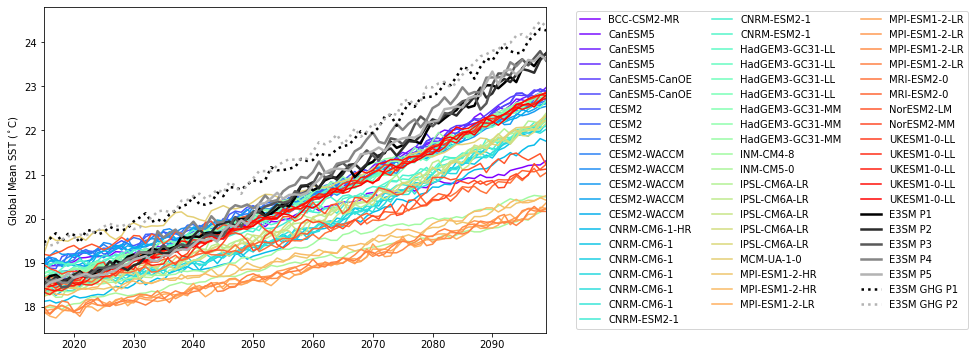

In [9]:
cmap = cm.get_cmap('rainbow')
ifrac = np.linspace(0,1,nsource)
cmap2 = cm.get_cmap('gray')
# ifrac2 = np.linspace(0,0.7,ne3smcase)
ifrac2 = np.linspace(0,0.7,5)
ifrac3 = np.linspace(0,0.7,ne3smcase-5)

fig = plt.figure(figsize=(9, 6))
ax = plt.gca()
for k in np.arange(nsource):
    plt.plot(time, esgf_data_ann[k,:], \
            color=cmap(ifrac[k]), \
            label=sources[k]['model'])
ax.set_ylabel('Global Mean SST ($^\circ$C)')
e3sm_label = []
for k in np.arange(ne3smcase):
    if k <= 4:
        label = 'E3SM P{:d}'.format(k+1)
        ax.plot(time, e3sm_data_ann[k,:], \
                color=cmap2(ifrac2[k]), linewidth=2.5, label=label)
    else:
        label = 'E3SM GHG P{:d}'.format(k-4)
        ax.plot(time, e3sm_data_ann[k,:], \
                color=cmap2(ifrac3[k-5]), linestyle='dotted', \
                linewidth=2.5, label=label)
    e3sm_label.append(label)
            
ax.set_xlim([time[0], time[-1]])
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=3)


In [10]:
np.savez('e3sm_sst.npz', data=e3sm_data_ann, time=time, label=e3sm_label)

In [11]:
esgf_label = [s['model']+'_'+s['variantid'] for s in sources]
print(esgf_label)

['BCC-CSM2-MR_r1i1p1f1', 'CanESM5_r17i1p2f1', 'CanESM5_r25i1p2f1', 'CanESM5_r2i1p2f1', 'CanESM5-CanOE_r1i1p2f1', 'CanESM5-CanOE_r2i1p2f1', 'CESM2_r10i1p1f1', 'CESM2_r11i1p1f1', 'CESM2_r4i1p1f1', 'CESM2-WACCM_r1i1p1f1', 'CESM2-WACCM_r2i1p1f1', 'CESM2-WACCM_r3i1p1f1', 'CESM2-WACCM_r4i1p1f1', 'CESM2-WACCM_r5i1p1f1', 'CNRM-CM6-1-HR_r1i1p1f2', 'CNRM-CM6-1_r1i1p1f2', 'CNRM-CM6-1_r2i1p1f2', 'CNRM-CM6-1_r3i1p1f2', 'CNRM-CM6-1_r4i1p1f2', 'CNRM-CM6-1_r5i1p1f2', 'CNRM-ESM2-1_r1i1p1f2', 'CNRM-ESM2-1_r4i1p1f2', 'CNRM-ESM2-1_r5i1p1f2', 'HadGEM3-GC31-LL_r1i1p1f3', 'HadGEM3-GC31-LL_r2i1p1f3', 'HadGEM3-GC31-LL_r3i1p1f3', 'HadGEM3-GC31-LL_r4i1p1f3', 'HadGEM3-GC31-MM_r1i1p1f3', 'HadGEM3-GC31-MM_r2i1p1f3', 'HadGEM3-GC31-MM_r3i1p1f3', 'INM-CM4-8_r1i1p1f1', 'INM-CM5-0_r1i1p1f1', 'IPSL-CM6A-LR_r14i1p1f1', 'IPSL-CM6A-LR_r1i1p1f1', 'IPSL-CM6A-LR_r2i1p1f1', 'IPSL-CM6A-LR_r3i1p1f1', 'IPSL-CM6A-LR_r4i1p1f1', 'MCM-UA-1-0_r1i1p1f2', 'MPI-ESM1-2-HR_r1i1p1f1', 'MPI-ESM1-2-HR_r2i1p1f1', 'MPI-ESM1-2-LR_r10i1p1f1', 'MPI

In [12]:
np.savez('esgf_sst.npz', data=esgf_data_ann, time=time, label=esgf_label)